## Problem Statement:


This assignment challenges students to construct and train a neural network to
accurately classify handwritten digits from the MNIST dataset. The goal is to
navigate through the preprocessing of image data, select an appropriate neural
network architecture, and apply optimization techniques to achieve high
classification accuracy.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6881 - loss: 1.1066 - val_accuracy: 0.9090 - val_loss: 0.3241
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9111 - loss: 0.3166 - val_accuracy: 0.9269 - val_loss: 0.2545
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9287 - loss: 0.2511 - val_accuracy: 0.9370 - val_loss: 0.2183
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9386 - loss: 0.2155 - val_accuracy: 0.9449 - val_loss: 0.1901
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9472 - loss: 0.1867 - val_accuracy: 0.9510 - val_loss: 0.1676
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9517 - loss: 0.1717 - val_accuracy: 0.9554 - val_loss: 0.1555
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9566 - loss: 0.1532 - val_accuracy: 0.9579 - val_loss: 0.1439
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9601 - loss: 0.1395 - 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9592 - loss: 0.1399
Test accuracy: 0.965499997138977


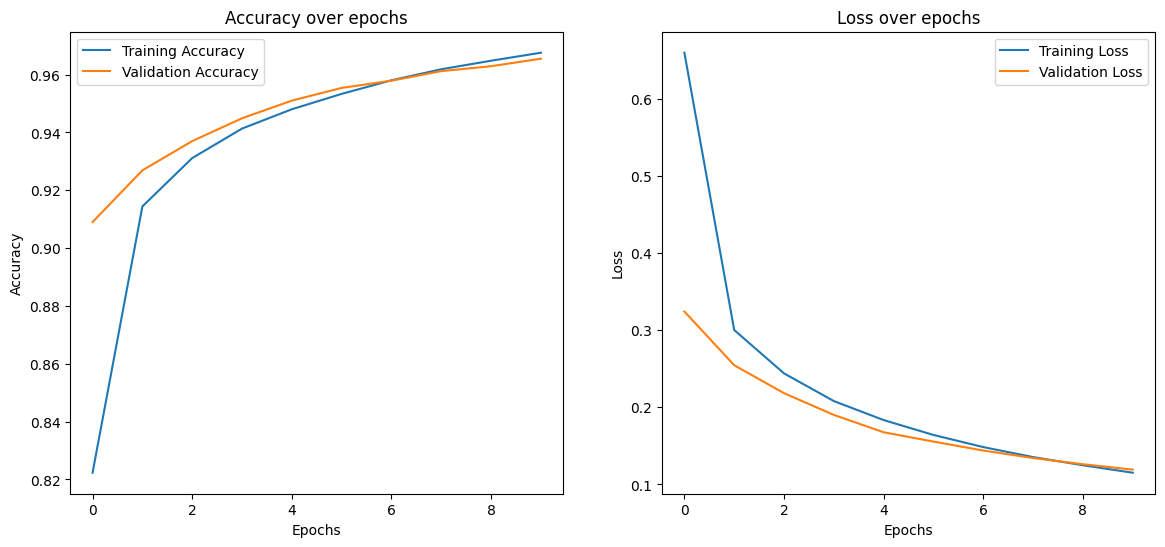

In [ ]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()




In [ ]:
# Prediction on a single image
predictions = model.predict(x_test)
print(f'Predicted class: {tf.argmax(predictions[0]).numpy()}, Actual class: {tf.argmax(y_test[0]).numpy()}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted class: 7, Actual class: 7


## Challenges and Considerations:

1. Class Imbalance: Not an issue with MNIST as it is well-balanced.
2. Model Complexity: Using dropout to avoid overfitting.
3. Activation Functions: Using ReLU in hidden layers and softmax in the output layer.
4. Evaluation Metrics: Tracking accuracy and loss.
5. Hyperparameter Tuning: Experimenting with learning rate, batch size, and number of epochs.
6. Predictions and Interpretability: Clear predictions with well-calibrated probabilities.

In [ ]:
!pip install keras-tuner
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='mnist_hyperparameter_tuning')

tuner.search(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
best_model = tuner.get_best_models(num_models=1)[0]


Trial 5 Complete [00h 09m 27s]
val_accuracy: 0.9799666802088419

Best val_accuracy So Far: 0.9822666645050049
Total elapsed time: 00h 56m 02s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f'Final test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9782 - loss: 0.0838
Final test accuracy: 0.982699990272522


In [ ]:
# Example: Convert to TensorFlow SavedModel format
tf.saved_model.save(best_model, 'path_to_saved_model')
